# UK Inflation impacting HPI (House Price Index)

## Table of Contents


- ### 1. Introduction - UK Inflation impacting HPI (House Price Index)    
- ### 2. Aim and objectives
- ### 3. Data Source
- ### 4. Webscrapping
- ### 5. Data Analysis              
- ### 6. Data Preprocessing
- ### 7. Data Visualization
- ### 8. Training and Test Data
- ### 9. Linear Regression
- ### 10. Random Forest        
- ### 11. Conclusion and Evaluation
- ### 12. References           
        


## 1. Introduction: UK Inflation impacting HPI (House Price Index)

     
   The below content is taken from Office for National Statistics [1] , Landregistry [2] and House Buyer bureau [3]. Please see the links in the reference section.

### 1.1	What does inflation mean?
     
Inflation is defined as the price increase (usually shown as a percentage) of any goods and services in a particular economy (e.g. the UK) over a given period of time. Inflation signifies a decrease in cash purchasing power as goods and services get more expensive. [3]

### 1.2	What causes Inflation?

The causes of inflation vary depending on specific moments in time. As of 16 November 2022, the UK inflation rate year on year is an eye-watering 9.6%, with indicators suggesting that this could continue to increase to over 10% during 2023. At the moment, factors such as increases in production costs (e.g. raw materials and wages), geopolitical instability and supply and demand for basic necessities such as food and housing contribute to an increase in inflation and, therefore, living costs. [3]


### 1.3 How Does Inflation Affect House Value?

In terms of the housing market, the rate of inflation causes house prices to increase or decrease in line with the price of goods and services. When inflation rises, it can cause the price of properties to increase over and above where the average value might sit – due to simple supply and demand. High inflation rates cause fewer homeowners to want to move, meaning there are fewer properties on the market for buyers to choose from. This increased demand for a small number of properties causes the house value to rise which often leads to many potential buyers, especially first-time buyers, being priced out of purchasing a property. Effectively, homes can often be worth more when inflation is higher. It’s important to note there is a balance between inflation and property prices. If inflation causes mortgage rates to increase too much, buyers will not be able to apply for loans and therefore demand will decrease. When this happens, house prices will decrease. [3]

In recent years, inflation and demand have caused the average property value to increase greatly. For example, in January 2022, the average UK house price was £274,000. Just one year earlier, in January 2021, this number sat £24,000 cheaper at around £250,000. Unfortunately, it’s not possible to predict inflation precisely and therefore it is hard to say how house prices will change over the coming months and years. However, it’s important to remember that inflation must end at some point and house prices will be affected again when it does.[3]


### 1.4 What is HPI (House Price Index)?

The UK House Price Index (HPI) uses house sales data from HM Land Registry, Registers of Scotland, and Land and Property Services Northern Ireland and is calculated by the Office for National Statistics. [2] 


### 1.5 Some important points about UK House Price Index: July 2022.

As per Office for National Statistics [1], the important points about UK House Price Index: July 2022 are as follows:

- UK average house prices increased by 15.5% over the year to July 2022, up from 7.8% in June 2022.

- This is the highest annual inflation rate the UK has seen since May 2003.

- This jump in annual inflation was mainly because of a base effect from the falls in prices seen this time last year, as a result of changes in the stamp duty holiday.

- Average UK house prices increased by £6,000 between June and July this year, compared with a fall of £13,000 between the same months last year.

- The average UK house price was £292,000 in July 2022, which is £39,000 higher than this time last year.

- Average house prices increased over the year in England to £312,000 (16.4%), in Wales to £220,000 (17.6%), in Scotland to £193,000 (9.9%) and in Northern Ireland to £169,000 (9.6%).


## 2. Aims and objectives

We are aware of the fact that UK inflation impacted HPI(House Price Index). Hence, we would like to analyse the trend and pattern of 'House Average' Price. 

We have downlaoded the 'UK House Price Index' dataset from London Datastore [4] to identify 'House Average Price' patterns and trends. This data set contain Average Price of Greater London and regions of England. It also contain Average Price of have Inner London, Outer London and England which contain the Average Price.

Visualizing the trend and pattern innner london and outer london following which will help us to understand more about dataset (32 boroughs and the City of London) . We would also like to visulize the trend and pattern England is following to understand more about dataset (regions of England ).

Applying linear regression and random forest regression to this dataset, to check which model will fit better. This will include initialization of the model, train the model on the training data, make predictions on the test data, evaluate the model's performance and plotting the graphs.


## 3. Data Source

The dataset is taken from London Datastore, please see the link [4] in the reference section.

Data License is provided in the link [5] of reference section., please see the content below:

You are encouraged to use and re-use the Information that is available under this licence freely and flexibly, with only a few conditions.

Using Information under this licence.
- Use of copyright and database right material expressly made available under this licence (the 'Information') indicates your acceptance of the terms and conditions below.
- The Licensor grants you a worldwide, royalty-free, perpetual, non-exclusive licence to use the Information subject to the conditions below.
- This licence does not affect your freedom under fair dealing or fair use or any other copyright or database right exceptions and limitations.

You are free to:
- copy, publish, distribute and transmit the Information;
- adapt the Information;
- exploit the Information commercially and non-commercially for example, by combining it with other Information, or by including it in your own product or application.


## Importing the libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 4. Webscrapping

### Scrapping the Office for National Statistics 

The content is taken from Office for National Statistics [1]. Request the URL using requests.get(url) and print it's content.

In [2]:
url = "https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/july2022"
r  = requests.get(url) # Making a GET request
print(r.content) # print content of request

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>UK House Price Index - Office for National Statistics</title>\n<meta charset="utf-8" />\n<meta content="width=device-width,initial-scale=1.0,user-scalable=1" name="viewport">\n<meta name="theme-color" content="#58595B">\n<meta name="apple-mobile-web-app-status-bar-style" content="#58595B">\n<meta name="description" content="Monthly house price inflation in the UK, calculated using data from HM Land Registry, Registers of Scotland, and Land and Property Services Northern Ireland.">\n<link rel="canonical" href="/economy/inflationandpriceindices/bulletins/housepriceindex/july2022" />\n<link rel="stylesheet" type="text/css" href="//cdn.ons.gov.uk/sixteens/30948d6/css/main.css">\n<script>\n\n    // getUsuageCookieValue reads the cookies_policy cookie and returns the value a user has set for usage, \n    // or defaults to true to opt_out of usage cookie if no cookie is set, or theres an error getting the value\n    function getUsageCookieVa

### Parsing the HTML

In [3]:
soup = BeautifulSoup(r.content, 'html.parser') # Parsing the HTML
print(soup.prettify()) 

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   UK House Price Index - Office for National Statistics
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1.0,user-scalable=1" name="viewport"/>
  <meta content="#58595B" name="theme-color"/>
  <meta content="#58595B" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="Monthly house price inflation in the UK, calculated using data from HM Land Registry, Registers of Scotland, and Land and Property Services Northern Ireland." name="description"/>
  <link href="/economy/inflationandpriceindices/bulletins/housepriceindex/july2022" rel="canonical"/>
  <link href="//cdn.ons.gov.uk/sixteens/30948d6/css/main.css" rel="stylesheet" type="text/css"/>
  <script>
   // getUsuageCookieValue reads the cookies_policy cookie and returns the value a user has set for usage, 
    // or defaults to true to opt_out of usage cookie if no cookie is set, or theres an error getting the value
    function getUsa

### Let's find the title tag and its text

In [4]:
print(soup.title)

<title>UK House Price Index - Office for National Statistics</title>


In [5]:
print(soup.title.text) 

UK House Price Index - Office for National Statistics


## 5. Data Analysis - UK HPI (House Price Index) 

### Read the dataset using pandas

Downloaded the dataset in excel format from London Datastore, please see the link [4] in the resource section.

In [6]:
url = "./UK House price index.xlsx"
UK_HPI = pd.read_excel(url, sheet_name = 'Average price')
UK_HPI

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022-06-01,826671.21421,344732.93311,593748.45591,391072.04415,523332.78868,501791.86995,827080.80209,416422.93872,524202.61721,...,209709.31517,204585.57582,244227.14686,244449.90771,350751.70373,532686.9083,389250.01439,321346.9154,NaN,302869.01566
331,2022-07-01,810986.22915,348153.07104,591709.24877,395891.33713,542761.09922,505376.32798,842448.85206,421107.16853,529545.92481,...,215101.52366,208098.60081,246182.49994,252841.39603,355832.32154,542180.36383,396246.71165,329477.14069,NaN,309138.97253
332,2022-08-01,827052.33427,350093.95009,599519.11003,403463.36933,555829.4062,516057.98043,866018.80772,429041.51327,532679.33915,...,217325.1802,211840.98423,252506.61762,254019.45726,361361.27283,546260.82452,402558.84544,335339.0181,NaN,313526.20414
333,2022-09-01,799380.71414,349009.89869,604168.16389,403433.14821,582576.42639,518586.13884,859159.20403,434321.52191,535413.98892,...,219277.41569,213592.57647,253962.72863,255033.58583,363028.11032,546671.87573,404482.16327,337527.05949,NaN,315355.06675


### Findings:

The given UK_HPI Dataframe consist of 335 rows and 49 columns. 

### Let's find out column's name in UK_HPI dataframe

In [7]:
UK_HPI.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

### Findings:

- The UK_HPI DataFrame contain Average Price of Greater London and regions of England. This DataFrame also have Inner London, Outer London and England which contain the Average Price.
- The Greater London is made up of 32 boroughs and the City of London. They are 'Barking & Dagenham', 'Barnet','Bexley', Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth','Westminster'.
- There are 12 Inner London boroughs which are Camden, Greenwich, Hackney, Hammersmith and Fulham, Islington, Kensington and Chelsea, Lambeth, Lewisham, Southwark, Tower Hamlets, Wandsworth and Westminster. The other 20 are outer London boroughs and the City of London is not classed as a London borough.
- The regions of England are 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST'
- UK_HPI DataFrame contain Unnamed columns, we need to check if there is any data present in these column. If there is no data present then we need to delete these columns.

### Check for the non-null values and information about a UK_HPI DataFrame including the index, dtype and columns

In [8]:
UK_HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            334 non-null    datetime64[ns]
 1   City of London        335 non-null    object        
 2   Barking & Dagenham    335 non-null    object        
 3   Barnet                335 non-null    object        
 4   Bexley                335 non-null    object        
 5   Brent                 335 non-null    object        
 6   Bromley               335 non-null    object        
 7   Camden                335 non-null    object        
 8   Croydon               335 non-null    object        
 9   Ealing                335 non-null    object        
 10  Enfield               335 non-null    object        
 11  Greenwich             335 non-null    object        
 12  Hackney               335 non-null    object        
 13  Hammersmith & Fulham

### Findings:

- The UK_HPI DataFrame contain 49 columns out of which 3 columns contain 0 non-null value. In order to clean, we need to delete the column 'Unnamed: 34', 'Unnamed: 37' and 'Unnamed: 47'.
- The column 'Unnamed: 0' should be renamed as 'Date'.
- The UK_HPI DataFrame contain 49 columns with 335 entries and with its datatype.

### Visualize NaN values of the UK_HPI dataframe using heatmap method of sns package. 

<AxesSubplot:>

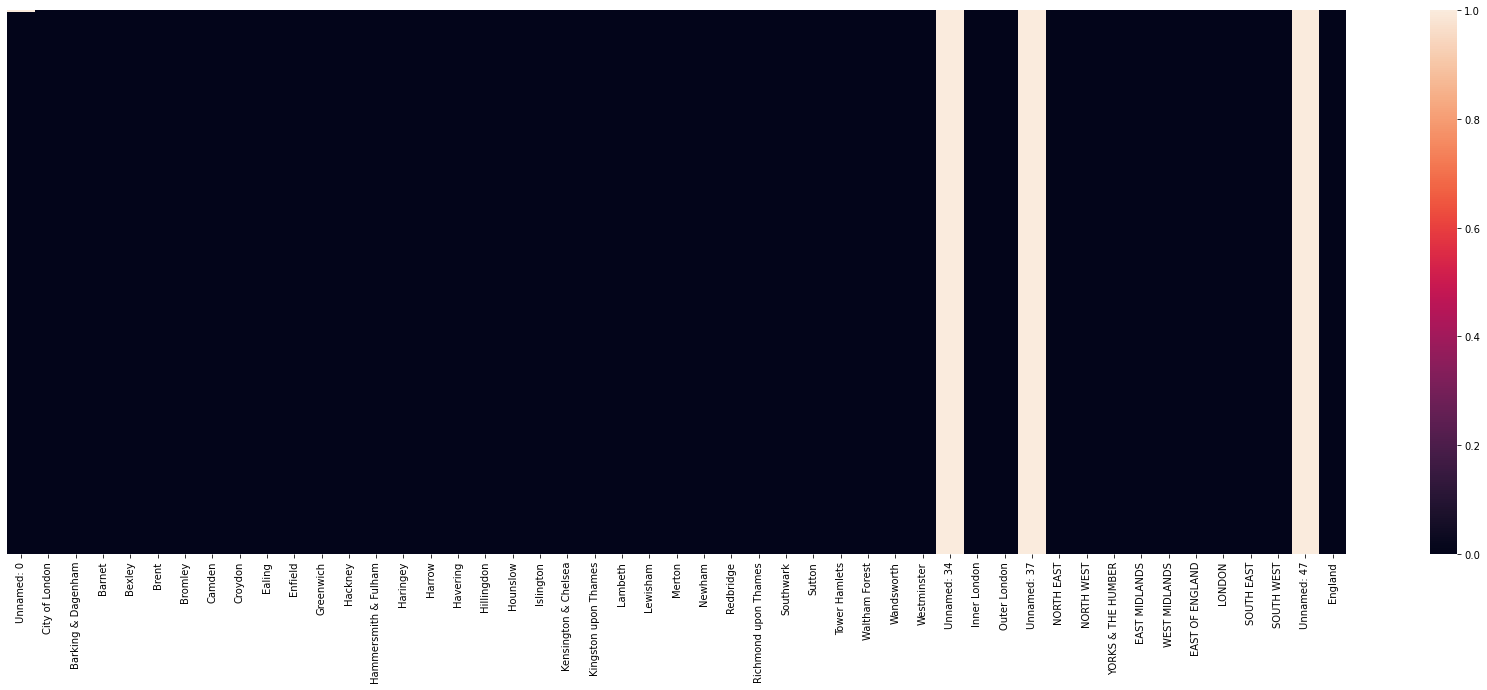

In [9]:
plt.figure(figsize=(30,10))
sns.heatmap(UK_HPI.isnull(),yticklabels=False)

### Findings

In the heatmap, if the color is black then there are no NaN values and if the color is light it shows the presence of NaN values. Hence, UK_HPI contain NaN Values.

## 6. Data Preprocessing

### Drop a row by index, as we do not need it for analysis.

In [10]:
UK_HPI_drop_row = UK_HPI.drop([0]) 
UK_HPI_drop_row.head(5)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041


 ### Remove missing values. Drop the columns where at least one element is missing.

In [11]:
UK_HPI_drop_column = UK_HPI_drop_row.dropna(axis='columns') 
UK_HPI_drop_column.head(5)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041


### Rename the column 'Unnamed: 0' as 'Date'

In [12]:
UK_HPI_rename = UK_HPI_drop_column.rename(columns={"Unnamed: 0": "Date"})
UK_HPI_rename.head(5)

,Date,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041


### Set the index of the UK_HPI_2 dataFrame with 'Date'

In [13]:
UK_HPI_data = UK_HPI_rename.set_index("Date")
UK_HPI_data.head(5)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548
1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,...,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,53678.24041


### Check if there is any Unnamed column in the UK_HPI_data dataframe.

In [14]:
UK_HPI_data.columns

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST',
       'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')

### Findings:

There are no unnamed column in the UK_HPI_data dataframe. 

### Check for the non-null values and information about a UK_HPI_data DataFrame including the index, dtype and columns

In [15]:
UK_HPI_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1995-01-01 to 2022-10-01
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City of London        334 non-null    object
 1   Barking & Dagenham    334 non-null    object
 2   Barnet                334 non-null    object
 3   Bexley                334 non-null    object
 4   Brent                 334 non-null    object
 5   Bromley               334 non-null    object
 6   Camden                334 non-null    object
 7   Croydon               334 non-null    object
 8   Ealing                334 non-null    object
 9   Enfield               334 non-null    object
 10  Greenwich             334 non-null    object
 11  Hackney               334 non-null    object
 12  Hammersmith & Fulham  334 non-null    object
 13  Haringey              334 non-null    object
 14  Harrow                334 non-null    object
 15  Havering             

### Findings:

- The UK_HPI_data DataFrame contain 45 columns with 334 entries and with its datatype.

## 7. Data Visualization

The UK_HPI_data DataFrame contain Average Price of Greater London and regions of England. This DataFrame also have Inner London, Outer London and England which contain the Average Price.

### Let's visualize from the given UK_HPI_data DataFrame, the  Inner London(House - Average Price) and Outer London(House - Average Price)

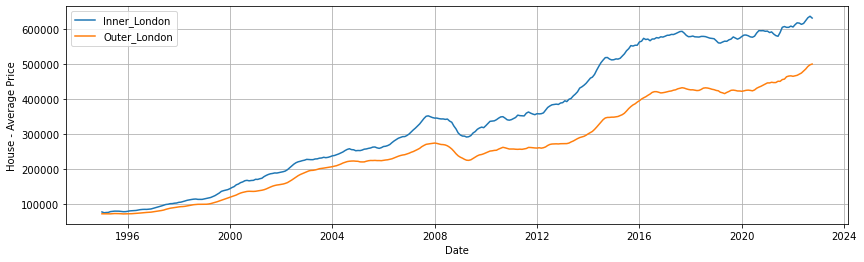

In [16]:
plt.figure(figsize=(14,4))
Inner_London = UK_HPI_data["Inner London"]
Outer_London = UK_HPI_data["Outer London"]
plt.plot(Inner_London, label = 'Inner_London')
plt.plot(Outer_London, label = 'Outer_London')
plt.xlabel('Date')
plt.ylabel('House - Average Price')
plt.grid()
plt.legend()

### Findings:

- The above garph shows that house price of the Inner London is higher than the Outer London.
- The trend of the graph is in upward direction from last 5 years. Hence, there is the possibility of upward trend in the future considering the fators impacting house price remain same.
- We can see that there was decline in the graph after 2008 which state that the house price decreased.
- We can also see that after 2010 there is an incline in the graph which state that the house price started increasing again.
- The graph shows that house price of the inner london has crossed £600000 and house price of the outer London is still touching £500000.

### Let's visualize from the given UK_HPI_data DataFrame for the  England.

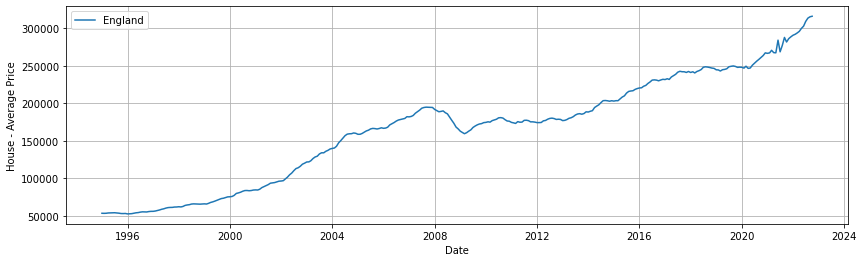

In [17]:
plt.figure(figsize=(14,4))
England = UK_HPI_data["England"]
plt.plot(England, label = 'England')
plt.xlabel('Date')
plt.ylabel('House - Average Price')
plt.grid()
plt.legend()

### Findings:

- The above garph shows that house price of the England has crossed £300000.
- The trend of the graph is in upward direction from last 5 years. Hence, there is the possibility of upward trend in the future considering the fators impacting house price remain same.
- We can see that there was decline in the graph after 2008 which state that the house price decreased.
- We can also see that after 2010 there is an incline in the graph which state that the house price started increasing again.

## 8. Training and Test Data

England_regions and England will be used as training and test dataframe. These will be used in linear regression and random forest.

In [18]:
England_regions = UK_HPI_data[["NORTH EAST","NORTH WEST", "YORKS & THE HUMBER", "EAST MIDLANDS", "WEST MIDLANDS", "EAST OF ENGLAND", "LONDON", "SOUTH EAST", "SOUTH WEST"]]
England_regions

,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST
Date,,,,,,,,,
1995-01-01,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579
1995-02-01,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843
1995-03-01,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667
1995-04-01,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938
1995-05-01,43266.45165,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831
...,...,...,...,...,...,...,...,...,...
2022-06-01,155655.41857,209709.31517,204585.57582,244227.14686,244449.90771,350751.70373,532686.9083,389250.01439,321346.9154
2022-07-01,161086.08619,215101.52366,208098.60081,246182.49994,252841.39603,355832.32154,542180.36383,396246.71165,329477.14069
2022-08-01,162852.39393,217325.1802,211840.98423,252506.61762,254019.45726,361361.27283,546260.82452,402558.84544,335339.0181


In [19]:
England_regions.describe()

,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST
count,334.00000,334.00000,334.00000,334.00000,334.00000,334.0000,334.00000,334.00000,334.0000
unique,334.00000,334.00000,334.00000,334.00000,334.00000,334.0000,334.00000,334.00000,334.0000
top,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579
freq,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.0000


In [20]:
England = UK_HPI_data["England"]
England

Date
1995-01-01     53202.77128
1995-02-01      53096.1549
1995-03-01      53201.2843
1995-04-01      53590.8548
1995-05-01     53678.24041
                  ...     
2022-06-01    302869.01566
2022-07-01    309138.97253
2022-08-01    313526.20414
2022-09-01    315355.06675
2022-10-01    316073.10269
Name: England, Length: 334, dtype: object

In [21]:
England.describe()

count       334.00000
unique      334.00000
top       53202.77128
freq          1.00000
Name: England, dtype: float64

### Splicing of the training and test dataset

In [22]:
England_regions_train, England_regions_test, England_train, England_test = train_test_split(England_regions, England, test_size=0.2)

## 9. Linear Regression

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if y is the predicted value. y(w,x) = w0 + w1x1 + .. +wpxp. Across the module, we designate the vector w = (w1 + .. +wp) as coef_ and  w0 as intercept_.[5] 

In [23]:
# Initialize the model
Linear_Regression = LinearRegression()

In [24]:
# Train the model on the training data
Linear_Regression.fit(England_regions_train, England_train)

LinearRegression()

In [25]:
# Make predictions on the test data
England_pred = Linear_Regression.predict(England_regions_test)

### mean_squared_error function

It computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. [7]

In [26]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mean_squared_error(England_test, England_pred)

124921.36939281679

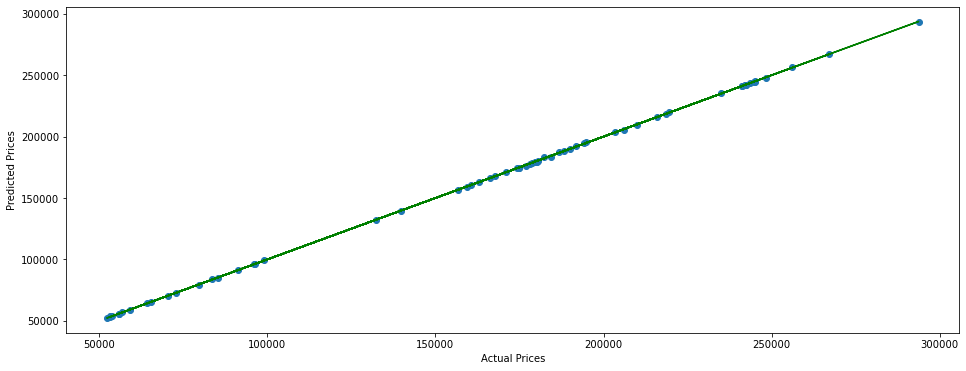

In [27]:
plt.figure(figsize=(16,6))
# Plot the actual vs predicted values
plt.scatter(England_test, England_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Plot the line of best fit
plt.plot(England_test, England_test, color='green')
plt.show()

Findings:

A linear regression include data points and a line of best fit that represents the estimated relationship between the variables.

The above graph represent the data points that fall close to the line of best fit indicate that the model is a good fit. 

## 10. Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. [6]

In [28]:
# Initialize the model with a certain number of trees (default is 10)
Random_Forest= RandomForestRegressor(n_estimators=100)

In [29]:
# Train the model on the training data
Random_Forest.fit(England_regions_train, England_train)

RandomForestRegressor()

In [30]:
# Make predictions on the test data
England_pred = Random_Forest.predict(England_regions_test)

In [31]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(England_test, England_pred))

Mean Squared Error: 483975.8979547152


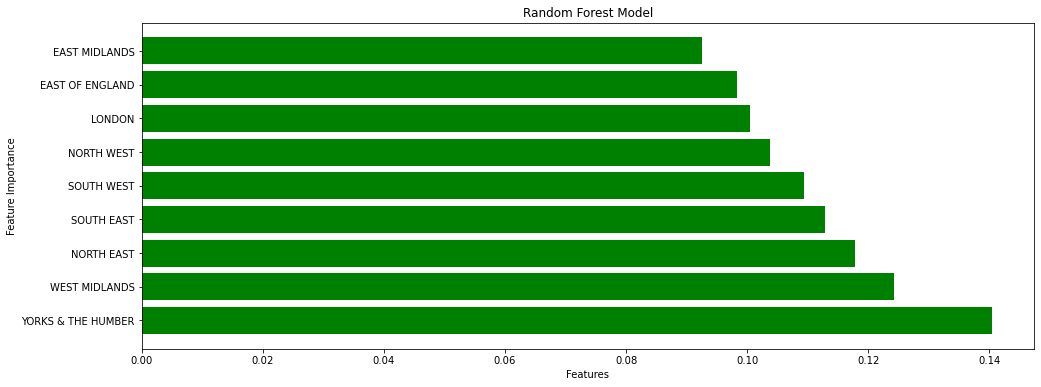

In [32]:
plt.figure(figsize=(16,6))

# Get feature importances
importances = Random_Forest.feature_importances_

# Sort features by importance
sorted_index = importances.argsort()[::-1]

# Create x labels
England_regions_labels = [England_regions.columns[i] for i in sorted_index]

# Create a bar plot
plt.barh(England_regions_labels, importances[sorted_index], color = 'green')
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Random Forest Model")

plt.show()


# 11. Conclusions and Evaluation

 
 
 There are several factors that can impact the UK house price index, including:

- Economic conditions: A strong economy may show increased demand for housing and higher prices, while a weak economy may show decreased demand and lower prices.

- Interest rates: Low interest rates make borrowing cheaper, which can increase demand for housing and drive prices up. High interest rates can have the opposite effect.

- Supply and demand: If there is a high demand for housing and limited supply, prices will tend to rise. Conversely, if there is low demand and a surplus of housing, prices will tend to fall.

- Location: Prices of properties in some locations such as London, are generally higher than in other regions.

We have seen from the graph that the average house price increased for inner London and outer London over a period of time. Even the England house price increased over a period of time. For example, if a person need to a buy house in inner London and have £500000, then it will be difficult for them to purchase it. He can buy the house in the outter London or he need to wait for the drop in the house price of the inner London. This is how, inflation has impacted the UK house price. However, The trend of the graph for inner London, outer London and England are in upward direction from last 5 years. Hence, there is the possibility of upward trend in the future, considering the fators impacting house price remain same.

As per MSE(Mean Squared Error) calculated above the Linear Regression mean squared error is less than random forest regression.

A smaller MSE value indicates that the model has a better fit to the data and is able to make more accurate predictions. However, it is important to note that a low MSE does not necessarily mean that the model is the best one for the problem, as it does not take into account other performance metrics, assumptions of the model, or the underlying structure of the data.

Hence, we can conclude that the linear regression model is the better fit for my dataet.

In future, we need to try more models to check if there is any better model than linear regression for the dataset. For importing more model we need to learn about it from mutiple sorces available on website. 

# 12. References

1. https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/july2022

2. https://landregistry.data.gov.uk/app/ukhpi#:~:text=The%20UK%20House%20Price%20Index%20%28HPI%29%20uses%20house,calculated%20by%20the%20Office%20for%20National%20Statistics%20.

3. https://www.housebuyerbureau.co.uk/blog/how-does-inflation-affect-property-prices/ 

4. https://data.london.gov.uk/dataset/uk-house-price-index

5. https://scikit-learn.org/stable/modules/linear_model.html#linear-model

6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

7. https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

In [33]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
